TUKAJ NEKAJ NAPIŠI

In [3]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
import os.path
pot_do_podatkov = os.path.join("../../", "avtomobili", "Avtomobili", "obdelani-podatki", "oglasi.csv")

avti = pd.read_csv(pot_do_podatkov)

Poglejmo si podatke.

In [4]:
avti

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena
0,Abarth - 500-PANORAMA-ODLIÈEN,Abarth,2008,119000 km,bencinski motor,ročni menjalnik,1369 ccm,99 kW / 135 KM\r\n,9650
1,Alfa Romeo 147 1.9 JTD Distinctive,Alfa,2005,232000 km,diesel motor,ročni menjalnik,1910 ccm,85 kW / 116 KM\r\n,1500
2,Alfa Romeo 147 1.9 JTD Distinctive,Alfa,2003,340000 km,diesel motor,ročni menjalnik,1910 ccm,85 kW / 116 KM\r\n,350
3,Alfa Romeo 147 1.9 JTD M-JET-HITRI KREDIT BREZ...,Alfa,2006,243900 km,diesel motor,ročni menjalnik,1910 ccm,88 kW / 120 KM\r\n,1790
4,Alfa Romeo 156 Sportwagon 1.9 JTD Progression,Alfa,2003,338000 km,diesel motor,ročni menjalnik,1910 ccm,85 kW / 116 KM\r\n,1250
...,...,...,...,...,...,...,...,...,...
930,Volvo V60 D6 AWD Summum Hybrid Plug-in,Volvo,2013,209745 km,diesel motor,avtomatski menjalnik,2400 ccm,158 kW / 215 KM\r\n,14400
931,Volvo XC60 2.4 5valjni D4 AWD|4x4 Summum®Gear...,Volvo,2016,145282 km,diesel motor,avtomatski menjalnik,2400 ccm,140 kW / 190 KM\r\n,20999
932,Volvo XC60 FWD D4 Momentum,Volvo,2014,205000 km,diesel motor,ročni menjalnik,1969 ccm,133 kW / 181 KM\r\n,15300
933,Volvo XC90 D5 AWD Kinetic Geartronic,Volvo,2017,82457 km,diesel motor,avtomatski menjalnik,1969 ccm,173 kW / 235 KM\r\n,30900


Iz vsakega oglasa za dan avtomobil izločimo sledeče:
- polno ime
- znamko
- leto prve registracije
- vrsto motorja
- vrsto menjalnika
- velikost motorja
- moč motorja
- ceno

## Avto za študenta

Denimo da ima študent privarčevanih 500€ in ga zanima ali si z njimi lahko privošči nakup avtomobila. Ali lahko na spletni strani avto.net najde kaj primernega? Postavimo dodatne pogoje, starost avtomobila manj kot 15 let in manj kot 150 000 prevoženih kilometrov, da zožimo iskanje na nekoliko bolj ohranjene avte.

In [34]:
avti[(avti.cena < 1000) & (avti.leto_prve_registracije > 2011)]

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena
441,Mercedes-Benz C-Razred,Mercedes-Benz,2021,245000 km,bencinski motor,ročni menjalnik,1995 ccm,93 kW / 126 KM\r\n,990
822,Volkswagen Golf Variant 2.0 TDI BMT Highline D...,Volkswagen,2014,175532 km,diesel motor,avtomatski menjalnik,1968 ccm,110 kW / 150 KM\r\n,800


In [47]:
letni_avti = avti.groupby("leto_prve_registracije")

In [60]:
avti["desetletje"] = 10 * (avti.leto_prve_registracije // 10)
avti

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena,desetletje
0,Abarth - 500-PANORAMA-ODLIÈEN,Abarth,2008,119000 km,bencinski motor,ročni menjalnik,1369 ccm,99 kW / 135 KM\r\n,9650,2000
1,Alfa Romeo 147 1.9 JTD Distinctive,Alfa,2005,232000 km,diesel motor,ročni menjalnik,1910 ccm,85 kW / 116 KM\r\n,1500,2000
2,Alfa Romeo 147 1.9 JTD Distinctive,Alfa,2003,340000 km,diesel motor,ročni menjalnik,1910 ccm,85 kW / 116 KM\r\n,350,2000
3,Alfa Romeo 147 1.9 JTD M-JET-HITRI KREDIT BREZ...,Alfa,2006,243900 km,diesel motor,ročni menjalnik,1910 ccm,88 kW / 120 KM\r\n,1790,2000
4,Alfa Romeo 156 Sportwagon 1.9 JTD Progression,Alfa,2003,338000 km,diesel motor,ročni menjalnik,1910 ccm,85 kW / 116 KM\r\n,1250,2000
...,...,...,...,...,...,...,...,...,...,...
930,Volvo V60 D6 AWD Summum Hybrid Plug-in,Volvo,2013,209745 km,diesel motor,avtomatski menjalnik,2400 ccm,158 kW / 215 KM\r\n,14400,2010
931,Volvo XC60 2.4 5valjni D4 AWD|4x4 Summum®Gear...,Volvo,2016,145282 km,diesel motor,avtomatski menjalnik,2400 ccm,140 kW / 190 KM\r\n,20999,2010
932,Volvo XC60 FWD D4 Momentum,Volvo,2014,205000 km,diesel motor,ročni menjalnik,1969 ccm,133 kW / 181 KM\r\n,15300,2010
933,Volvo XC90 D5 AWD Kinetic Geartronic,Volvo,2017,82457 km,diesel motor,avtomatski menjalnik,1969 ccm,173 kW / 235 KM\r\n,30900,2010


In [62]:
desetletni_avti = avti.groupby("desetletje")

In [70]:
desetletni_avti.cena.mean().round()

desetletje
1950    11000.0
1960     5490.0
1970     9627.0
1980     7100.0
1990     1873.0
2000     3326.0
2010    15094.0
2020    29375.0
Name: cena, dtype: float64

In [72]:
desetletni_avti.size()

desetletje
1950      1
1960      1
1970      3
1980      4
1990     35
2000    357
2010    521
2020     13
dtype: int64

<AxesSubplot:xlabel='desetletje'>

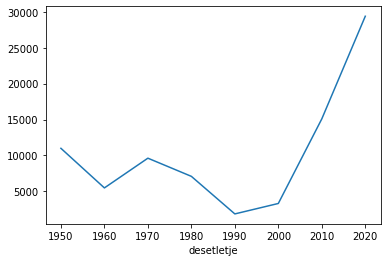

In [73]:
desetletni_avti.cena.mean().plot()

<AxesSubplot:xlabel='leto_prve_registracije', ylabel='cena'>

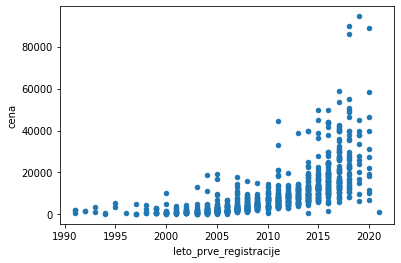

In [79]:
avti[avti.leto_prve_registracije > 1990].plot.scatter("leto_prve_registracije", "cena")

<AxesSubplot:xlabel='znamka'>

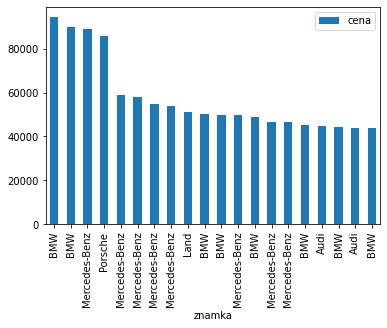

In [83]:
avti.sort_values('cena', ascending=False).head(20).plot.bar(x='znamka', y='cena')